# Data Scientist's Handbook - II

## Machine Learning using Scikit Learn

In the "Data Scientist's Handbook - I" notebook we have completed the Exploratory Data Analysis (EDA). It enabled us to isentify the most useful features to explain the variance in target.

In the following block, we briefly go through only the essential steps to re-create an effective set of features.

Then, we will build various regression models and compare their performance.

Note that in this notebook we are performing only non-Bayesian analysis.

In the next notebook, we will use Bayesian analysis to measure the uncertainty of the predictions.


In [19]:
import pandas as pd

df = pd.read_csv('/Users/hasan/datasets/DataScienceRepository/student-mat.csv')


# Data cleaning: Drop the Missing Target Values
df = df[~df['G3'].isin([0, 1])]

# Rename the target column
df = df.rename(columns={'G3': 'Grade'})

#********************************************************************************

## Generate an effective feature set

# Drop the redundant features
df = df.drop(columns=['school', 'G1', 'G2'])

# Combine the categorical features (via One-Hot Encoding) with the numeric features
df = pd.get_dummies(df)

# Find correlations with the Grade
most_correlated = df.corr().abs()['Grade'].sort_values(ascending=False)

# Maintain the top 8 most correlation features with Grade
most_correlated = most_correlated[:8]


print("Most Correlated Features\n")
print(most_correlated)

# Edit the DataFrame to Contain Only the Most Correlated Features¶
df = df.ix[:, most_correlated.index]
df = df.drop(columns = 'schoolsup_no') # This feature has the same correlation as schoolsup_yes

#********************************************************************************
## Create a Separate Feature Set (Data Matrix X) and Target (1D Vector y)

# It contains all attributes (features and the target)
allData = df

y = df['Grade'] # 1D targer vector
X = df.drop(columns='Grade')  # Data Matrix containing all features excluding the label


Most Correlated Features

Grade            1.000000
failures         0.293831
schoolsup_yes    0.238365
schoolsup_no     0.238365
absences         0.213129
Medu             0.190308
Walc             0.190054
goout            0.177383
Name: Grade, dtype: float64


/Users/hasan/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:33: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


## 1. Machine Learning Using Scikit Learn

- a). Create Train and Test Sata Set
- b). Establish Benchmarks Metrics
- c). Apply Machine Learning Models for Regression

## 1(a). Create Train and Test Data Set

To test the performance of the ML model (Linear Regression), we need to set aside some data (e.g., 20%) for testing.

To split the data into training and testing set, we will use Scikit-learn's train_test_split() function.

In [14]:
# Create a Separate Test Set Data

from sklearn.model_selection import train_test_split

# Split into training/testing sets with 20% split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

## 1(b). Establish Benchmarks Metrics

To evaluate the performance of this regression task, we will use two standard metrics:

- Mean Absolute Error (MAE): Average of the absolute value of the difference between predictions and the true values
- Root Mean Squared Error (RMSE): The square root of the average of the squared differences between the predictions and the true values.

The mean absolute error is more interpretable, but the root mean squared error penalizes larger errors more heavily. Either one may be appropriate depending on the situation.

In [15]:
# Calculate mae and rmse
def evaluate_predictions(predictions, true):
    mae = np.mean(abs(predictions - true))
    rmse = np.sqrt(np.mean((predictions - true) ** 2))
    
    return mae, rmse

## 1(c). Apply Machine Learning Models for Regression

In [20]:
import numpy as np

# Standard ML Models for comparison
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

# Distributions
import scipy


# Evaluate several ml models by training on training set and testing on testing set
def evaluate(X_train, X_test, y_train, y_test):
    # Names of models
    model_name_list = ['Linear Regression', 'ElasticNet Regression',
                      'Random Forest', 'Extra Trees', 'SVM',
                       'Gradient Boosted', 'Baseline']
#     X_train = X_train.drop(columns='Grade')
#     X_test = X_test.drop(columns='Grade')
    
    # Instantiate the models
    model1 = LinearRegression()
    model2 = ElasticNet(alpha=1.0, l1_ratio=0.5)
    model3 = RandomForestRegressor(n_estimators=50)
    model4 = ExtraTreesRegressor(n_estimators=50)
    model5 = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
    model6 = GradientBoostingRegressor(n_estimators=20)
    
    # Dataframe for results
    results = pd.DataFrame(columns=['mae', 'rmse'], index = model_name_list)
    
    # Train and predict with each model
    for i, model in enumerate([model1, model2, model3, model4, model5, model6]):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        # Metrics
        mae = np.mean(abs(predictions - y_test))
        rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
        
        # Insert results into the dataframe
        model_name = model_name_list[i]
        results.ix[model_name, :] = [mae, rmse]
    
    # Median Value Baseline Metrics
    baseline = np.median(y_train)
    baseline_mae = np.mean(abs(baseline - y_test))
    baseline_rmse = np.sqrt(np.mean((baseline - y_test) ** 2))
    
    results.ix['Baseline', :] = [baseline_mae, baseline_rmse]
    
    return results

results = evaluate(X_train, X_test, y_train, y_test)

/Users/hasan/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:53: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/Users/hasan/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:53: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/Users/hasan/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:53: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/Users/hasan/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:60: DeprecationWarning

## 2. Visual Comparison of Models

After generating various models, we need to compare their performance.

We perform both visual and textual comparison.

                           mae     rmse
Linear Regression      2.10332  2.64849
ElasticNet Regression  2.45073  2.95719
Random Forest          2.37012  2.98396
Extra Trees            2.72824  3.48122
SVM                    2.32607  2.85958
Gradient Boosted       2.23799  2.74884
Baseline               2.54167   3.1336


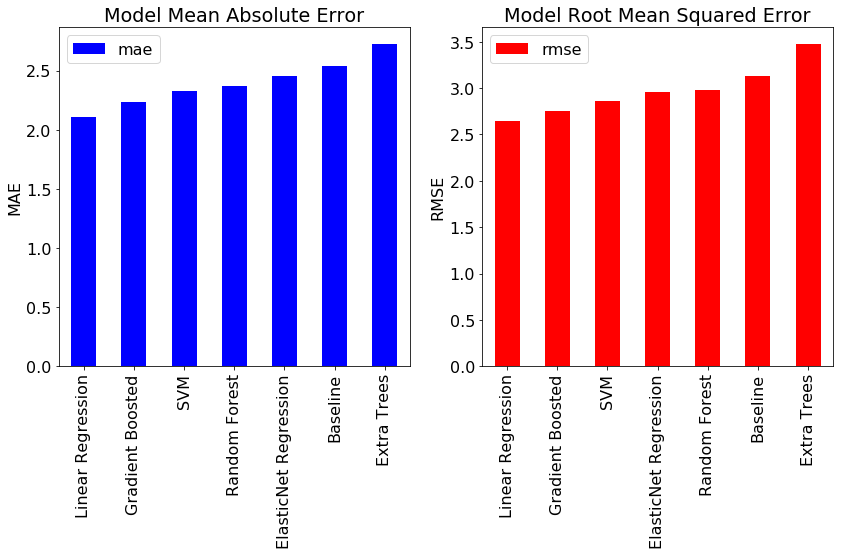

In [21]:

%matplotlib inline
from IPython.core.pylabtools import figsize

import matplotlib.pyplot as plt
import matplotlib

figsize(12, 8)
matplotlib.rcParams['font.size'] = 16
# Root mean squared error
ax =  plt.subplot(1, 2, 1)
results.sort_values('mae', ascending = True).plot.bar(y = 'mae', color = 'b', ax = ax)
plt.title('Model Mean Absolute Error'); plt.ylabel('MAE');

# Median absolute percentage error
ax = plt.subplot(1, 2, 2)
results.sort_values('rmse', ascending = True).plot.bar(y = 'rmse', color = 'r', ax = ax)
plt.title('Model Root Mean Squared Error'); plt.ylabel('RMSE');

plt.tight_layout()

print(results)

## Analysis of the Comparison

Observe that both the MAE and the RMSE values from the Linear Rgression model are the smallest as compared to other regression models.

Hence, we conclude that Linear Regression is so far the best model for predicting student grades for the given data set.

### But how confident are we about the predictions?

To have a quantative understanding of our confidence on the model, it is important to investigate the uncertainty of the feature weights. 

### Why do we care about measuaring uncertainty of the feature weights?

Recall that in a typical Linear Regression problem, the target is predicted by a linear combination of the features. For example, the grades (target variable y) are assumed to be some linear combination of the features x (e.g., evaluation scores and relevant student data). Let's say that there are d such features. Then, the target is given by:

y = intercept + w1*x1 + w2*x2 + ... + wd*xd 

A Linear Regression model finds appropriate vaules for the intercept and the weight value w's for each feature to make correct predictions. The intercept and the weight w's are called the parameters of the model.

In the current problem, we estimated the weights for 6 features and the intercept to predict the grades:

y(predicted) = intercept + w1*x1 + w2*x2 + w3*x3 + w4*x4 + w5*x5 + w6*x6 + w7*x7 

Where,
- x1 = failures
- x2 = schoolsup_yes
- x3 = absences
- x4 = Medu
- x5 = Walc
- x6 = goout

Our Linear Regression model computed the point estimates for these weights and the intercept. However, these values are mean estimates. There could be uncertainty (variance) around these estimates. Unfortunately the Linear Regression model that we used don't capture this uncertainty.

So, we are not sure whether a particulr weight is trustworthy or not. For example, if a weight has a large variance, then we won't have much trust on it. In other words, then, the associated feature might not be useful to explain the variance in the target.

Therefore, we need to estimate the uncertainty of the feature weights to better understand the predictive power of our model.

This is done in the next notebook by using Bayesian analysis.
